# Escort Profile EDA

This notebook performs exploratory data analysis on cleaned escort profile data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
df = pd.read_csv("../data/processed/all_profiles.csv")
df.replace("", pd.NA, inplace=True)
df["desc_length"] = df["description"].astype(str).apply(len)
df["title_length"] = df["title"].astype(str).apply(len)

# Basic overview
df.head()

,title,description,profile_url,phone,age,location,image_url,category,source,desc_length,title_length
0,FUN HOTT Aussie Chick CJ keen 2 find some new ...,"Hey, I m Chloe Janee I m 18 recentlyt just sta...",https://www.locanto.com.au/brisbane/ID_7554557...,NaN,18.0,NaN,NaN,femaleEscort,NaN,297,60
1,Quickly Blow And Go Service,"Text me 0451885118 Hi guy, I am a good sucker ...",https://www.locanto.com.au/vic/ID_7570504461/Q...,0451885118,20.0,NaN,NaN,femaleEscort,NaN,283,27
2,Vermont New Arrived! Beautiful face Sexy figur...,Hi Boys I m Hannah. A Model good looking girl....,https://www.locanto.com.au/vic/ID_7569608635/V...,NaN,NaN,NaN,NaN,femaleEscort,NaN,301,64
3,Outdoor fun anyone?,Looking to meet someone. Find what you’re look...,https://www.locanto.com.au/g/dol/signup/?utm_s...,NaN,NaN,NaN,NaN,femaleEscort,NaN,57,19
4,INDIAN PUNJABI COLLEGE GIRL AVAILABLE FOR YOU,Text me on WhatsApp 61489043930 Text me on Wha...,https://www.locanto.com.au/melbourne/ID_756891...,NaN,NaN,NaN,NaN,femaleEscort,NaN,63,45


## 📦 Data Summary

In [2]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1279 non-null   object 
 1   description   1279 non-null   object 
 2   profile_url   1279 non-null   object 
 3   phone         246 non-null    object 
 4   age           419 non-null    float64
 5   location      184 non-null    object 
 6   image_url     63 non-null     object 
 7   category      1279 non-null   object 
 8   source        0 non-null      float64
 9   desc_length   1279 non-null   int64  
 10  title_length  1279 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 110.0+ KB


,title,description,profile_url,phone,age,location,image_url,category,source,desc_length,title_length
count,1279,1279,1279,246,419.000000,184,63,1279,0.0,1279.000000,1279.000000
unique,1259,1199,1268,224,NaN,36,63,72,NaN,NaN,NaN
top,NAT ANAL CIP CIA DFK PARTY PUFF CREAM PIE CURV...,Located: in Ashburton near Alamein station Tex...,https://tryst.link/escort/dallasxhart,0411066173,NaN,Melbourne,https://escortify.com.au/oc-content/uploads/16...,femaleEscort,NaN,NaN,NaN
freq,4,9,3,4,NaN,112,1,306,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,29.947494,NaN,NaN,NaN,NaN,231.538702,39.549648
std,NaN,NaN,NaN,NaN,9.935539,NaN,NaN,NaN,NaN,96.469817,16.939333
min,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,5.000000,3.000000
25%,NaN,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,150.000000,25.000000
50%,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,296.000000,41.000000
75%,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,299.000000,55.000000


## 🔍 Missing Values

In [3]:
df.isna().sum().sort_values(ascending=False)

source          1279
image_url       1216
location        1095
phone           1033
age              860
title              0
description        0
profile_url        0
category           0
desc_length        0
title_length       0
dtype: int64

## 🏷️ Category Distribution

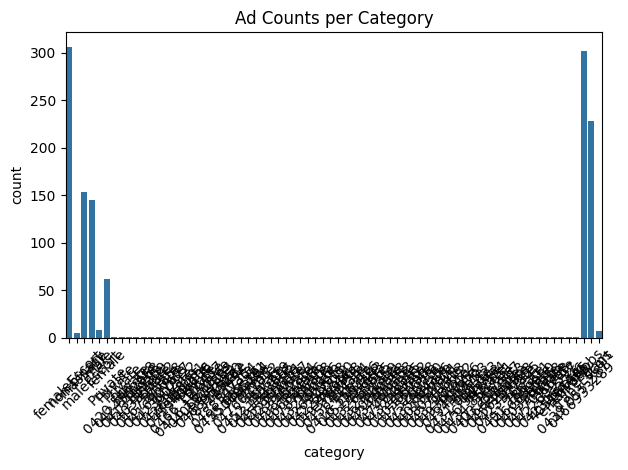

In [4]:
sns.countplot(data=df, x='category')
plt.xticks(rotation=45)
plt.title("Ad Counts per Category")
plt.tight_layout()
plt.show()

## 📍 Top Locations

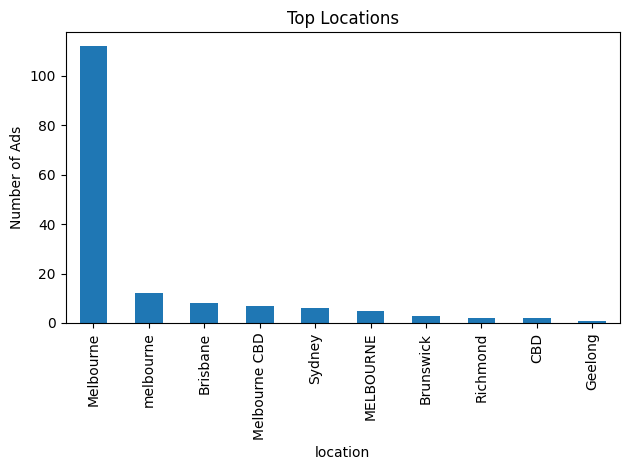

In [5]:
df['location'].value_counts().head(10).plot(kind='bar', title='Top Locations')
plt.ylabel('Number of Ads')
plt.tight_layout()
plt.show()

## 🎂 Age Distribution

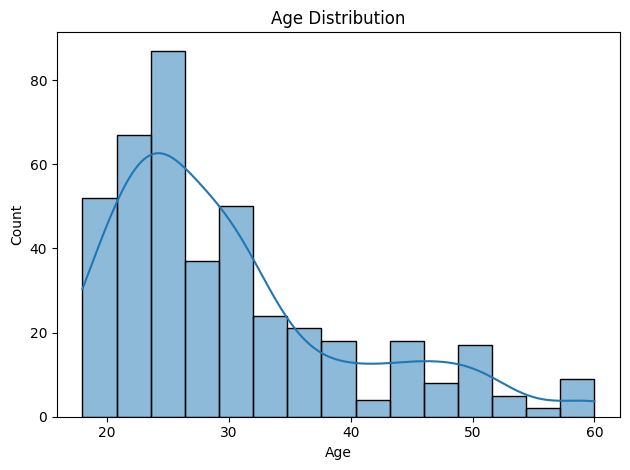

In [6]:
sns.histplot(df['age'].dropna(), bins=15, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

## ✏️ Description Length by Category

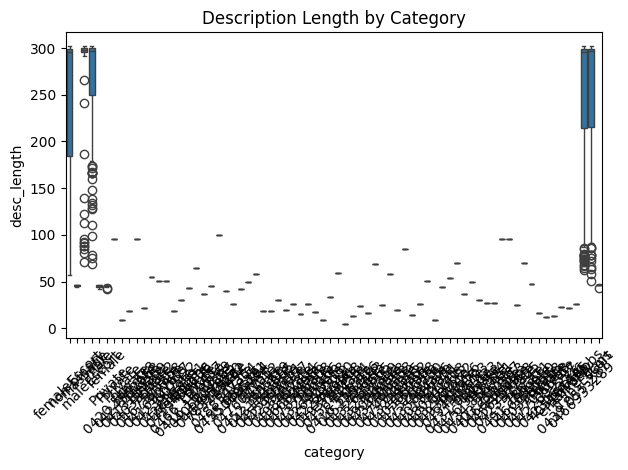

In [7]:
sns.boxplot(data=df, x='category', y='desc_length')
plt.title("Description Length by Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## ☎️ Most Reused Phone Numbers

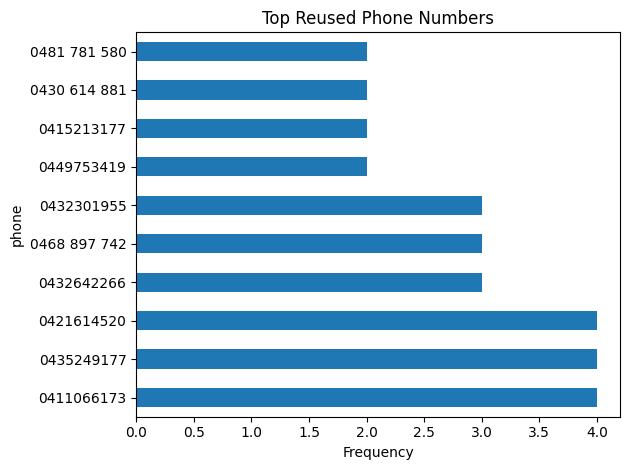

In [8]:
df['phone'].value_counts().head(10).plot(kind='barh', title='Top Reused Phone Numbers')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

## ☁️ WordCloud of Descriptions

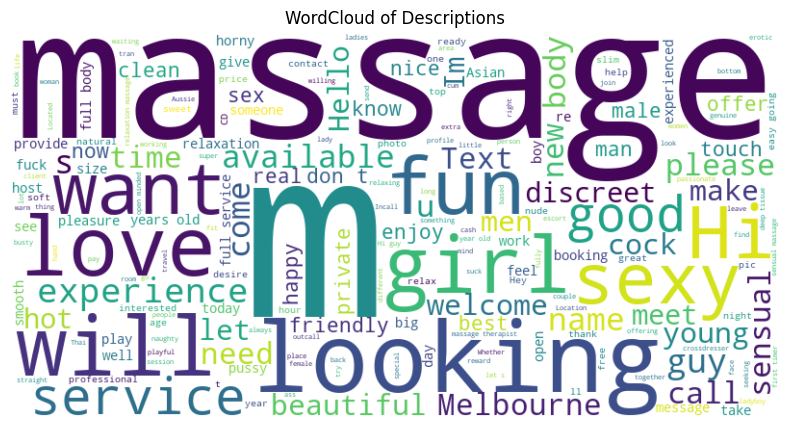

In [9]:
text = " ".join(df['description'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Descriptions')
plt.show()

## 📈 TF-IDF Analysis (Top 20 Terms)

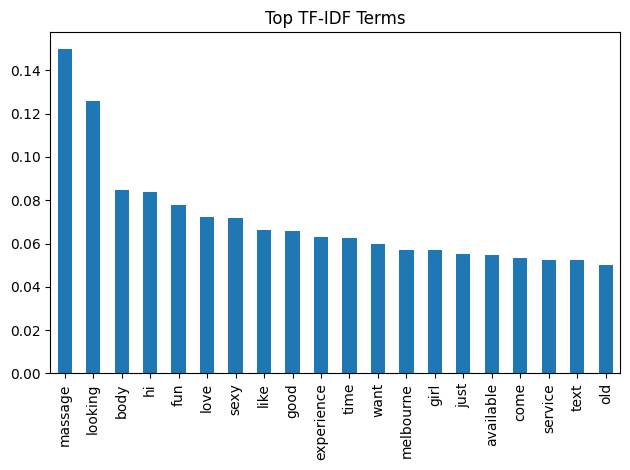

In [10]:
tfidf = TfidfVectorizer(max_features=20, stop_words='english')
X = tfidf.fit_transform(df['description'].fillna(''))
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df.mean().sort_values(ascending=False).plot(kind='bar', title='Top TF-IDF Terms')
plt.tight_layout()
plt.show()